# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn
import math

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

4870
2435
2435


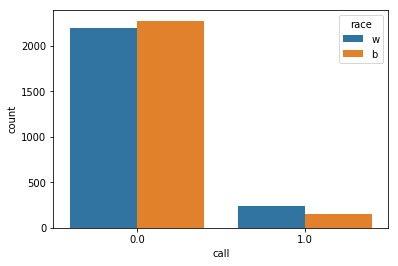

In [4]:
# Condensing the dataframe into the "race" and "call" columns
data = data[['race','call']]
print(len(data))
print(sum(data.race=='w'))
print(sum(data.race=='b'))
sn.countplot(x=data['call'], hue=data['race'])

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

### 1) What test is appropriate for this problem? Does CLT apply?
### 2) What are the null and alternate hypotheses?

#### Answer 1: Two-sample t-test, to find if two population means are equal. CLT applies because the sample size is large, n=4870 and observations are independent of one another.

#### Answer 2: Null Hypothesis = The average difference in callback rates between "b" and "w" is zero.
#### Alternate Hypothesis = The average callbacks between "w" is different than the average callbacks of "b".

### 3) Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [5]:
b = data[data.race == 'b']
w = data[data.race == 'w']
print(len(w), len(b))

# margin of error = z*sqrt(p(1-p)/n), where p is the sample proportion and n = number of sample,
# and z = 1.96 for a 95 Percent confidence interval

b_prop = len(b[b.call==1])/len(b) # black proportion of callback rate
w_prop = len(w[w.call==1])/len(w) # white proportion of callback rate
print(w_prop, b_prop)

z = 1.96
n_b = len(b) # black sample size
n_w = len(w) # white sample size

margin_error = z*math.sqrt(w_prop*(1-w_prop)/n_w+b_prop*(1-b_prop)/n_b)
print('margin of error: ' + str(margin_error))

2435 2435
0.09650924024640657 0.06447638603696099
margin of error: 0.015255406349886438


In [6]:
# confidence interval
# (w_prop - b_prop) +/- margin_error

print('The 95% confidence interval for the difference of black vs. white call back rate' + str([w_prop - b_prop - margin_error, w_prop - b_prop + margin_error]))


The 95% confidence interval for the difference of black vs. white call back rate[0.016777447859559147, 0.047288260559332024]


In [25]:
# p_value
from statsmodels.stats.proportion import proportions_ztest
count = np.array([len(b[b.call==1]),len(w[w.call==1])])
nobs = np.array([len(b), len(w)])
stats, pval = proportions_ztest(count, nobs, value = 0)
print(pval)

3.983886837585077e-05


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## 4) Write a story describing the statistical significance in the context or the original problem.

#### With p-value < 0.05 and confidence interval that does not contain zero, we can reject the null hypothesis in favor of the alternate hypothesis that there is a statistically significant difference between callback rates for black and white sounding names. 

## 5) Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

#### Negative, this analysis only examines race in callback rate, however there are more data available in the dataset that could alter the result of the above analysis. To amend the analysis, I would include 'years of experience' or 'education' for examiantion and comparison.